In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import os
import pandas as pd
import re

In [2]:
files = os.listdir('./export_files/')
csv_file_paths = ['./export_files/' + f for f in files if f.endswith('.csv') and not f.endswith(').csv')]

In [3]:
columns = ['title', 'description', 'company'] # relevant columns

In [4]:
def plot_similarity_in_file(file, column='description'):
    dat = pd.read_csv(file, delimiter=';')
    descriptions = dat[column].to_list()
        
    tfidf = TfidfVectorizer().fit_transform(descriptions)
    # no need to normalize, since Vectorizer will return normalized tf-idf
    pairwise_similarity = tfidf * tfidf.T
    similarity_array = pairwise_similarity.toarray()
    ax = sns.heatmap(similarity_array, linewidth=0.5)
    ax.set_title(column)
    plt.show()
    return similarity_array

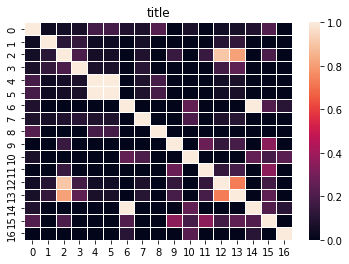

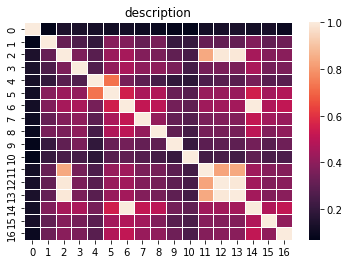

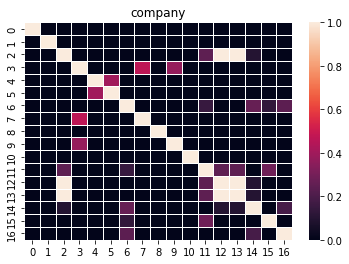

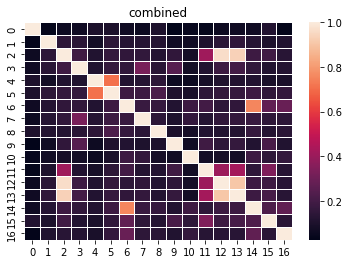

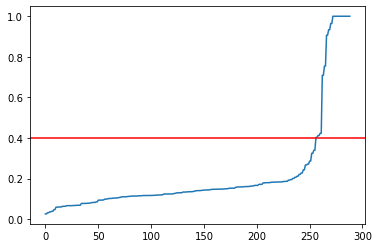

In [17]:
file = csv_file_paths[0]
for i, column in enumerate(columns):
    if i > 0:
        similarity_array += plot_similarity_in_file(file, column=column)
    else:
        similarity_array = plot_similarity_in_file(file, column=column)


x = similarity_array/len(columns)        
ax = sns.heatmap(x, linewidth=0.5)
ax.set_title('combined')
plt.show()

x_flat = x.flatten()
x_flat.sort()
plt.plot(x_flat)
plt.axhline(y=0.4, color='r', linestyle='-')
plt.show()

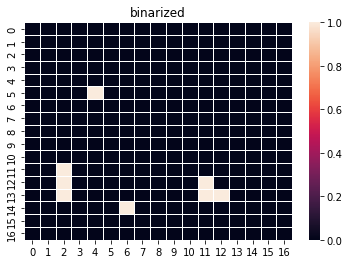

In [26]:
ones = 0
threshold = 0.4
values = []
binarized = np.zeros_like(x)
for row in range(x.shape[0]):
    for col in range(row):
        val = x[row,col]
        if row == col:
            pass
        elif val > threshold:
            binarized[row,col] = 1


ax = sns.heatmap(binarized, linewidth=0.5)
ax.set_title('binarized')
plt.show()
